In [1050]:
from agent import Agent
from game import Game
import random, time
import matplotlib.pyplot as plt

## **Generate maps and initiate agent**

In [1051]:
MAP_SIZE = 10
NUM_OF_SAMPLES = 10
PERCENTAGE = [10, 20, 30, 40, 50]
game_list = {}
for percentage in PERCENTAGE:
    games = []
    for i in range(NUM_OF_SAMPLES):
        random.seed(str(percentage) + str(i))
        game = Game(MAP_SIZE)
        game.generate_obstacles(int(percentage / 100 * MAP_SIZE * MAP_SIZE))
        games.append(game)
    game_list[percentage] = games

In [1052]:
NUM_OF_VISUALIZE = 5
visualize_samples = []
sample_set = set()
while len(visualize_samples) < NUM_OF_VISUALIZE:
    percentage_index, index = 0, 0
    while True:
        percentage_index = random.randint(0, len(PERCENTAGE) - 1)
        index = random.randint(0, NUM_OF_SAMPLES - 1)
        if (percentage_index, index) not in sample_set:
            sample_set.add((percentage_index, index))
            break
    visualize_samples.append(game_list[PERCENTAGE[percentage_index]][index])
for sample in visualize_samples:
    sample.visualize()

--------------------------------
| S  |  -  -  -  -  -  -  |  | |
| -  |  -  -  |  -  -  -  -  - |
| -  -  -  -  -  |  -  -  |  | |
| |  -  -  -  -  |  -  -  |  - |
| -  |  -  -  -  |  -  |  -  | |
| -  -  -  -  -  -  |  -  -  - |
| -  -  -  |  -  |  |  -  |  - |
| -  -  -  -  |  |  -  -  -  | |
| |  -  |  -  -  -  -  |  -  - |
| -  -  -  |  |  |  -  -  |  E |
--------------------------------
--------------------------------
| S  -  -  -  -  -  -  -  -  | |
| -  -  -  -  -  |  -  -  -  - |
| -  |  -  -  -  -  -  |  -  - |
| -  -  -  -  -  -  -  -  |  - |
| -  -  -  -  -  |  |  |  -  - |
| |  -  |  -  -  -  |  |  -  | |
| -  -  |  -  -  -  -  |  -  - |
| -  -  -  -  -  |  -  -  -  - |
| -  -  -  |  -  -  |  -  |  - |
| -  -  -  |  -  -  -  -  -  E |
--------------------------------
--------------------------------
| S  |  |  -  |  -  -  |  -  | |
| -  -  -  -  |  -  |  -  |  | |
| -  -  -  |  -  |  -  |  |  - |
| |  -  |  |  -  -  -  -  |  | |
| |  -  |  |  |  |  |  -  -  | |
| -  -  | 

In [1053]:
agent = Agent()

## **Solve by breadth-first search**

In [1054]:
breadth_first_search_time = {}
breadth_first_search_length = {}
breadth_first_search_solution = {}
for percentage in PERCENTAGE:
    breadth_first_search_time[percentage] = []
    breadth_first_search_length[percentage] = []
    breadth_first_search_solution[percentage] = []

In [1055]:
for percentage in PERCENTAGE:
    games = game_list[percentage]
    for test in games:
        agent.reset_solution()
        test.reset_board()
        start_time = time.time()
        agent.bfs(test)
        breadth_first_search_time[percentage].append(time.time() - start_time)
        breadth_first_search_length[percentage].append(len(agent.solution) - 1)
        breadth_first_search_solution[percentage].append(agent.solution)

In [1056]:
visualize_samples = []
sample_set = set()
while len(visualize_samples) < NUM_OF_VISUALIZE:
    percentage_index, index = 0, 0
    while True:
        percentage_index = random.randint(0, len(PERCENTAGE) - 1)
        index = random.randint(0, NUM_OF_SAMPLES - 1)
        if (percentage_index, index) not in sample_set:
            sample_set.add((percentage_index, index))
            break
    game = game_list[PERCENTAGE[percentage_index]][index]
    game.mark_solution(breadth_first_search_solution[PERCENTAGE[percentage_index]][index])
    visualize_samples.append(game)
for sample in visualize_samples:
    sample.visualize()

--------------------------------
| S  .  .  |  |  |  |  -  |  - |
| -  |  .  .  |  -  -  -  |  | |
| |  |  -  .  .  .  .  .  |  | |
| |  |  |  -  -  |  -  .  .  | |
| -  |  |  -  |  -  -  |  .  - |
| -  -  -  -  -  |  |  |  .  | |
| |  |  -  -  |  |  -  |  .  | |
| -  |  |  |  |  |  |  |  .  | |
| |  |  -  |  -  |  -  |  .  . |
| |  -  -  |  |  -  |  -  |  E |
--------------------------------
--------------------------------
| S  .  -  |  -  |  |  -  |  - |
| |  .  -  -  -  |  |  |  -  - |
| -  .  -  |  |  -  -  -  -  - |
| -  .  |  -  -  |  .  .  .  . |
| |  .  .  .  .  .  .  |  -  . |
| -  -  -  |  -  -  |  |  -  . |
| -  -  -  -  -  |  |  -  -  . |
| -  -  |  -  -  |  -  -  -  . |
| -  |  |  -  |  |  -  |  |  . |
| |  -  -  -  -  -  |  -  |  E |
--------------------------------
--------------------------------
| S  .  |  -  |  |  -  -  |  - |
| -  .  .  -  |  -  |  -  |  | |
| |  |  .  |  |  |  |  |  |  | |
| |  -  .  .  .  .  -  -  -  | |
| |  -  -  |  |  .  -  -  -  | |
| |  |  - 

## **Solve by depth-first search**

In [1057]:
depth_first_search_time = {}
depth_first_search_length = {}
depth_first_search_solution = {}
for percentage in PERCENTAGE:
    depth_first_search_time[percentage] = []
    depth_first_search_length[percentage] = []
    depth_first_search_solution[percentage] = []

In [1058]:
for percentage in PERCENTAGE:
    games = game_list[percentage]
    for test in games:
        agent.reset_solution()
        test.reset_board()
        start_time = time.time()
        agent.dfs(test)
        depth_first_search_time[percentage].append(time.time() - start_time)
        depth_first_search_length[percentage].append(len(agent.solution) - 1)
        depth_first_search_solution[percentage].append(agent.solution)

In [1059]:
visualize_samples = []
sample_set = set()
while len(visualize_samples) < NUM_OF_VISUALIZE:
    percentage_index, index = 0, 0
    while True:
        percentage_index = random.randint(0, len(PERCENTAGE) - 1)
        index = random.randint(0, NUM_OF_SAMPLES - 1)
        if (percentage_index, index) not in sample_set:
            sample_set.add((percentage_index, index))
            break
    game = game_list[PERCENTAGE[percentage_index]][index]
    game.mark_solution(depth_first_search_solution[PERCENTAGE[percentage_index]][index])
    visualize_samples.append(game)
for sample in visualize_samples:
    sample.visualize()

--------------------------------
| S  |  -  |  |  |  |  |  -  | |
| .  |  |  |  |  -  -  |  |  - |
| .  |  |  -  -  -  |  |  -  - |
| .  .  .  -  |  |  |  -  |  | |
| |  -  .  |  -  -  -  |  -  - |
| -  -  .  .  .  .  .  .  |  | |
| |  |  -  |  |  -  |  .  .  | |
| |  |  -  |  -  |  |  |  .  - |
| |  |  -  |  |  -  -  |  .  | |
| -  |  -  |  |  |  -  |  .  E |
--------------------------------
--------------------------------
| S  |  |  -  -  -  -  |  |  - |
| .  .  .  .  -  -  |  -  |  | |
| -  |  |  .  |  |  |  -  -  | |
| -  |  |  .  |  |  |  |  |  - |
| -  -  -  .  |  |  |  |  |  | |
| -  -  |  .  |  |  -  -  -  - |
| |  |  |  .  .  |  -  |  |  | |
| |  -  |  -  .  .  .  .  .  | |
| -  |  |  -  |  -  -  -  .  | |
| |  |  |  -  |  |  |  |  .  E |
--------------------------------
--------------------------------
| S  |  -  |  |  -  -  |  |  - |
| .  |  -  |  |  -  -  -  -  | |
| .  -  |  -  -  |  -  |  -  - |
| .  |  .  .  .  .  .  |  |  | |
| .  .  .  |  |  -  .  .  .  . |
| -  |  - 

## **Solve by best-first search**

In [1060]:
best_first_search_time = {}
best_first_search_length = {}
best_first_search_solution = {}
for percentage in PERCENTAGE:
    best_first_search_time[percentage] = []
    best_first_search_length[percentage] = []
    best_first_search_solution[percentage] = []

In [1061]:
for percentage in PERCENTAGE:
    games = game_list[percentage]
    for test in games:
        agent.reset_solution()
        test.reset_board()
        start_time = time.time()
        agent.best_first_search(test)
        best_first_search_time[percentage].append(time.time() - start_time)
        best_first_search_length[percentage].append(len(agent.solution) - 1)
        best_first_search_solution[percentage].append(agent.solution)

In [1062]:
visualize_samples = []
sample_set = set()
while len(visualize_samples) < NUM_OF_VISUALIZE:
    percentage_index, index = 0, 0
    while True:
        percentage_index = random.randint(0, len(PERCENTAGE) - 1)
        index = random.randint(0, NUM_OF_SAMPLES - 1)
        if (percentage_index, index) not in sample_set:
            sample_set.add((percentage_index, index))
            break
    game = game_list[PERCENTAGE[percentage_index]][index]
    game.mark_solution(best_first_search_solution[PERCENTAGE[percentage_index]][index])
    visualize_samples.append(game)
for sample in visualize_samples:
    sample.visualize()

--------------------------------
| S  |  |  -  |  -  -  |  |  - |
| .  .  -  |  -  -  |  |  -  - |
| |  .  |  |  -  -  -  -  -  - |
| |  .  |  -  -  -  |  -  |  | |
| |  .  .  |  -  |  |  -  |  | |
| |  -  .  |  |  -  -  |  |  | |
| -  -  .  .  .  |  |  |  |  | |
| |  |  |  |  .  .  |  |  |  - |
| |  |  -  |  |  .  .  .  .  . |
| |  |  |  |  |  -  -  -  |  E |
--------------------------------
--------------------------------
| S  .  .  .  |  -  -  -  |  - |
| -  |  |  .  .  .  .  .  .  . |
| -  -  |  -  -  -  -  -  -  . |
| -  |  -  -  -  -  |  -  -  . |
| -  -  -  -  -  -  -  -  -  . |
| -  -  -  -  -  -  -  -  -  . |
| -  -  -  -  -  -  -  -  -  . |
| -  -  |  -  -  -  -  -  -  . |
| |  -  -  -  -  -  -  -  -  . |
| -  -  -  -  -  |  -  -  -  E |
--------------------------------
--------------------------------
| S  .  .  .  .  .  |  |  |  - |
| -  |  |  |  -  .  -  |  -  | |
| -  -  |  -  -  .  |  |  -  - |
| -  |  -  -  |  .  .  .  .  - |
| |  -  -  -  -  -  |  |  .  - |
| |  |  | 

## **Solve by A\* search**

In [1063]:
a_search_time = {}
a_search_length = {}
a_search_solution = {}
for percentage in PERCENTAGE:
    a_search_time[percentage] = []
    a_search_length[percentage] = []
    a_search_solution[percentage] = []

In [1064]:
for percentage in PERCENTAGE:
    games = game_list[percentage]
    for test in games:
        agent.reset_solution()
        test.reset_board()
        start_time = time.time()
        agent.a_star_search(test)
        a_search_time[percentage].append(time.time() - start_time)
        a_search_length[percentage].append(len(agent.solution) - 1)
        a_search_solution[percentage].append(agent.solution)

In [1065]:
visualize_samples = []
sample_set = set()
while len(visualize_samples) < NUM_OF_VISUALIZE:
    percentage_index, index = 0, 0
    while True:
        percentage_index = random.randint(0, len(PERCENTAGE) - 1)
        index = random.randint(0, NUM_OF_SAMPLES - 1)
        if (percentage_index, index) not in sample_set:
            sample_set.add((percentage_index, index))
            break
    game = game_list[PERCENTAGE[percentage_index]][index]
    game.mark_solution(a_search_solution[PERCENTAGE[percentage_index]][index])
    visualize_samples.append(game)
for sample in visualize_samples:
    sample.visualize()

--------------------------------
| S  |  -  -  |  |  |  |  |  - |
| .  .  .  .  -  |  |  -  -  | |
| -  |  |  .  -  |  |  |  -  | |
| -  |  .  .  -  -  |  -  -  - |
| |  -  .  |  |  |  |  -  |  - |
| |  -  .  |  -  -  |  -  -  | |
| -  |  .  .  .  |  |  |  |  - |
| -  -  -  |  .  .  |  -  -  - |
| -  -  |  |  -  .  .  .  .  | |
| |  -  -  -  |  -  -  |  .  E |
--------------------------------
--------------------------------
| S  .  -  |  -  |  -  -  -  - |
| -  .  -  -  -  |  -  -  -  - |
| |  .  -  -  -  -  |  -  -  - |
| -  .  |  -  -  -  -  -  -  - |
| -  .  -  -  -  |  -  -  -  - |
| -  .  .  .  .  .  -  -  -  - |
| |  -  -  -  -  .  |  -  -  - |
| -  -  -  -  -  .  -  -  -  - |
| -  -  -  -  -  .  |  -  -  - |
| -  -  -  -  -  .  .  .  .  E |
--------------------------------
--------------------------------
| S  .  .  -  -  |  |  -  -  - |
| -  |  .  |  |  -  -  -  -  - |
| -  -  .  |  -  -  -  -  -  - |
| -  -  .  -  -  -  -  -  -  - |
| -  -  .  -  -  -  -  -  -  - |
| |  -  . 

## **Statistics**

### Average path length found by algorithms

Text(0, 0.5, 'Average path')

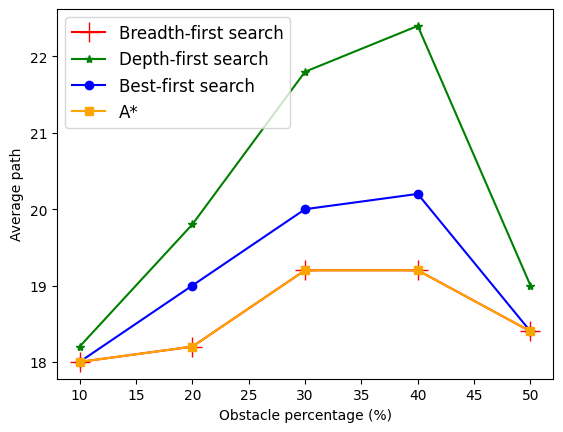

In [1066]:
x = []
bfs_path = []
dfs_path = []
best_first_path = []
a_path = []
for p in PERCENTAGE:
    x.append(p)
    bfs_path.append(sum(breadth_first_search_length[p])/len(breadth_first_search_length[p]))
    dfs_path.append(sum(depth_first_search_length[p])/len(depth_first_search_length[p]))
    best_first_path.append(sum(best_first_search_length[p])/len(best_first_search_length[p]))
    a_path.append(sum(a_search_length[p])/len(a_search_length[p]))
plt.plot(x, bfs_path, marker='+', markersize=15, label='Breadth-first search', color='red')  
plt.plot(x, dfs_path, marker='*', label='Depth-first search', color='green')  
plt.plot(x, best_first_path, marker='o', label='Best-first search', color='blue')  
plt.plot(x, a_path, marker='s', label='A*', color='orange')  
plt.legend(fontsize=12)
plt.xlabel("Obstacle percentage (%)")
plt.ylabel("Average path")

Text(0, 0.5, 'Runtime (ms)')

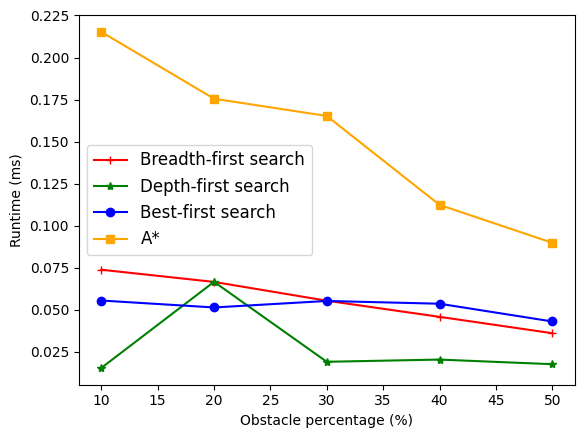

In [1067]:
x = []
bfs_time = []
dfs_time = []
best_first_time = []
a_time = []
for p in PERCENTAGE:
    x.append(p)
    bfs_time.append(sum(breadth_first_search_time[p])/len(breadth_first_search_time[p]) * 1000)
    dfs_time.append(sum(depth_first_search_time[p])/len(depth_first_search_time[p]) * 1000)
    best_first_time.append(sum(best_first_search_time[p])/len(best_first_search_time[p])  * 1000)
    a_time.append(sum(a_search_time[p])/len(a_search_time[p])  * 1000)
plt.plot(x, bfs_time, marker='+', label='Breadth-first search', color='red')  
plt.plot(x, dfs_time, marker='*', label='Depth-first search', color='green')  
plt.plot(x, best_first_time, marker='o', label='Best-first search', color='blue') 
plt.plot(x, a_time, marker='s', label='A*', color='orange')  
plt.legend(fontsize=12)
plt.xlabel("Obstacle percentage (%)")
plt.ylabel("Runtime (ms)")